In [164]:
import numpy as np
import pandas as pd
import collections
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [2]:
# TODO: Replace with your Student Number
_STUDENT_NUM = 'A0251445J'

In [ ]:
def feature_extraction():
    

In [3]:
def lemmetize_all(X):
    """ TODO: preprocess data"""
    X_lemmetize = []
    wnl = WordNetLemmatizer()
    for sentence in X:
        tmp = []
        for word, tag in nltk.pos_tag(word_tokenize(sentence)):
            if tag.startswith('NN'):
                tmp.append(wnl.lemmatize(word, pos='n'))
            elif tag.startswith('VB'):
                tmp.append(wnl.lemmatize(word, pos='v'))
            elif tag.startswith('JJ'):
                tmp.append(wnl.lemmatize(word, pos='a'))
            elif tag.startswith('R'):
                tmp.append(wnl.lemmatize(word, pos='r'))
            else:
                tmp.append(word)
            
        X_lemmetize.append(' '.join(tmp))
        
    return X_lemmetize

In [4]:
def add_sentence_length(X):
    return np.array([len(sentence.split()) for sentence in X]).reshape((-1, 1))



In [5]:
def train_model(model, X_train, y_train, method = 'nn', need_dev = 'False'):
    """ TODO: train your model based on the training data """
        
    if method == 'nn':
        model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
        
        if need_dev == 'True':
            X_train_post, X_dev_post, y_train_post, y_dev_post = train_test_split(
                X_train, y_train, test_size=0.2, random_state=42)
            history = model.fit(
                X_train_post, 
                y_train_post,
                batch_size=512,
                epochs=15,
                validation_data=(X_dev_post, y_dev_post),
            )
        else:
            history = model.fit(
                X_train, 
                y_train,
                batch_size=512,
                epochs=15,
            )
    
    return

In [67]:
def predict(model, X_test, method = 'nn'):
    """ TODO: make your prediction here """
    if method == 'nn':
        y_pred = np.argmax(model.predict(X_test), axis=1) - 1
    return y_pred

In [7]:
def generate_result(test, y_pred, filename):
    """ generate csv file base on the y_pred """
    test['Verdict'] = pd.Series(y_pred)
    test.drop(columns=['Text'], inplace=True)
    test.to_csv(filename, index=False)

In [8]:
def main():
    """ load train, val, and test data """
    train = pd.read_csv('train.csv')
    X_train = train['Text']
    y_train = train['Verdict']
    
    test = pd.read_csv('test.csv')
    X_test = test['Text']
    # preprocessing
    
    
    model = None  # TODO: Define your model here
    
    model = keras.Sequential(
    [
        layers.Dense(32, activation='relu', input_shape=(X_train_vec.shape[1],)),
        layers.Dropout(0.3),
        layers.Dense(16, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(3, activation='softmax'),
    ])

    # model.summary()
    
    train_model(model, X_train, y_train)
    
#     # test your model
#     y_pred = predict(model, X_train)

    # Use f1-macro as the metric
    score = f1_score(y_train, y_pred, average='macro')
    print('score on validation = {}'.format(score))

    # generate prediction on test data
    y_pred = predict(model, X_test)
    
#     generate_result(test, y_pred, _STUDENT_NUM + ".csv")

In [5]:
# Allow the main class to be invoked if run as a file.
if __name__ == "__main__":
    main()


In [120]:
train = pd.read_csv('train.csv')
X_train = train['Text']
y_train = train['Verdict']

# X_train = [word_tokenize(sentence) for sentence in X_train]

In [121]:
# X_train = lemmetize_all(X_train)

In [122]:
vectorizer = TfidfVectorizer().fit(X_train)
X_train_vec = vectorizer.transform(X_train).toarray()

y_train_dum = pd.get_dummies(y_train)

In [104]:
# Additional features
scaler = MinMaxScaler()
X_train_vec = np.concatenate((X_train_vec, scaler.fit_transform(add_sentence_length(X_train))), axis=1)

In [125]:
# reg = keras.regularizers.l2(0.001)
tf.random.set_seed(0)

model = keras.Sequential(
    [
        layers.Dense(32, activation='relu', input_shape=(X_train_vec.shape[1],)),
        layers.Dropout(0.3, seed=1),
        layers.Dense(16, activation='relu'),
        layers.Dropout(0.3, seed=1),
        
        layers.Dense(3, activation='softmax'),
    ])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 32)                365600    
_________________________________________________________________
dropout_60 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_95 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_61 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_96 (Dense)             (None, 3)                 51        
Total params: 366,179
Trainable params: 366,179
Non-trainable params: 0
_________________________________________________________________


In [126]:
X_train_post, X_dev_post, y_train_post, y_dev_post = train_test_split(
                X_train_vec, y_train_dum, test_size=0.2, random_state=42)
history = model.fit(
    X_train_post, 
    y_train_post,
    batch_size=512,
    epochs=10,
    validation_data=(X_dev_post, y_dev_post),
)

Epoch 1/10
36/36 [==============================] - 1s 20ms/step - loss: 1.0010 - accuracy: 0.6388 - val_loss: 0.8809 - val_accuracy: 0.6501
Epoch 2/10
36/36 [==============================] - 0s 13ms/step - loss: 0.8347 - accuracy: 0.6532 - val_loss: 0.7772 - val_accuracy: 0.6501
Epoch 3/10
36/36 [==============================] - 0s 13ms/step - loss: 0.7379 - accuracy: 0.6815 - val_loss: 0.6887 - val_accuracy: 0.7232
Epoch 4/10
36/36 [==============================] - 0s 13ms/step - loss: 0.6480 - accuracy: 0.7422 - val_loss: 0.6285 - val_accuracy: 0.7489
Epoch 5/10
36/36 [==============================] - 0s 13ms/step - loss: 0.5791 - accuracy: 0.7729 - val_loss: 0.6012 - val_accuracy: 0.7574
Epoch 6/10
36/36 [==============================] - 1s 14ms/step - loss: 0.5246 - accuracy: 0.7921 - val_loss: 0.5927 - val_accuracy: 0.7607
Epoch 7/10
36/36 [==============================] - 0s 13ms/step - loss: 0.4823 - accuracy: 0.8129 - val_loss: 0.5865 - val_accuracy: 0.7672
Epoch 8/10
36

In [96]:
test = pd.read_csv('test.csv')
X_test = test['Text']

# X_test = lemmetize_all(X_test)
X_test_vec = vectorizer.transform(X_test).toarray()
X_test_vec = np.concatenate((X_test_vec, scaler.transform(add_sentence_length(X_test))), axis=1)

In [97]:
model.predict(X_test_vec)

array([[0.67754084, 0.25269717, 0.06976201],
       [0.0311076 , 0.02417607, 0.94471633],
       [0.61919266, 0.26887876, 0.1119286 ],
       ...,
       [0.99217176, 0.00557549, 0.00225268],
       [0.658842  , 0.25753182, 0.08362612],
       [0.97676635, 0.01514566, 0.00808804]], dtype=float32)

In [98]:
y_pred = np.argmax(model.predict(X_test_vec), axis=1) - 1

In [93]:
generate_result(test, y_pred, _STUDENT_NUM + ".csv")

In [ ]:
potential_words = ['if', 'could', 'might', 'may', 'can']

In [140]:
vectorizer = CountVectorizer()
vectorized_texts = vectorizer.fit_transform(X_train)

In [141]:
vectorized_texts

<22501x11424 sparse matrix of type '<class 'numpy.int64'>'
	with 335979 stored elements in Compressed Sparse Row format>

In [155]:
classifier = MultinomialNB()
classifier.fit(vectorized_texts, y_train)

MultinomialNB()

In [156]:
y_pred = classifier.predict(vectorized_texts)

In [157]:
score = f1_score(y_train, y_pred, average='macro')

In [158]:
score

0.7175508264672326

In [163]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(X_train[1])

{'neg': 0.195, 'neu': 0.805, 'pos': 0.0, 'compound': -0.4404}

In [178]:
class_polarity = collections.defaultdict(list)
class_polarity[-1] = [0, 0, 0, 0]
class_polarity[0] = [0, 0, 0, 0]
class_polarity[1] = [0, 0, 0, 0]

sid = SentimentIntensityAnalyzer()

for i in range(len(X_train)):
    ss = sid.polarity_scores(X_train[i])
    class_polarity[y_train[i]][0] += ss['neg']
    class_polarity[y_train[i]][1] += ss['neu']
    class_polarity[y_train[i]][2] += ss['pos']
    class_polarity[y_train[i]][3] += ss['compound']

<AxesSubplot:>

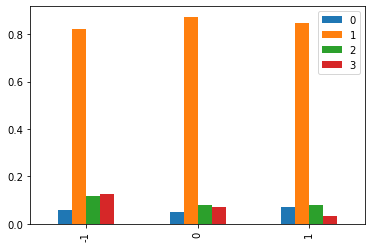

In [197]:
pd.DataFrame.from_dict(class_polarity, orient='index').div(y_train.value_counts(), axis=0).plot.bar()